In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [93]:
# converting the datset into dataframe
df = pd.read_csv("bbc-text.csv")

In [94]:
#defining the lenght of the train and test data
train_data_size = int(len(df)* .7)

In [95]:
# function for the spliting the dataset in 70% and 30% manner
def train_test_split(df, train_data_size):
    train_data = df[:train_data_size]
    test_data = df[train_data_size:]
    return train_data, test_data

In [96]:
#spliting the dataset and seperating out the for category and text
train_cat, test_cat = train_test_split(df['category'], train_data_size)
train_text, test_text = train_test_split(df['text'], train_data_size)

In [97]:
# tokenizing the text
# after that converting it into array
vector = CountVectorizer()
vector.fit(train_text)
vector.fit(test_text)
a = vector.transform(train_text)
b = vector.transform(test_text)
x_train = a.toarray()
x_test = b.toarray()

In [98]:
x_test.shape

(668, 17129)

In [113]:
# converting the lebels from string to number
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [114]:
# choosing the Random Forest Model. Because it reduces the overfitting and it has lower variance
model = RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True)

In [115]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=True)

In [116]:
# using the model for prediction on the test dataset
y_pred = model.predict(x_test)

In [117]:
#determinig out of the bag accuracy the accuracy of the model
accuracy = model.oob_score_

In [118]:
accuracy

0.9531149646756584

In [119]:
# detremining the error of the model
error = 1 - model.oob_score_

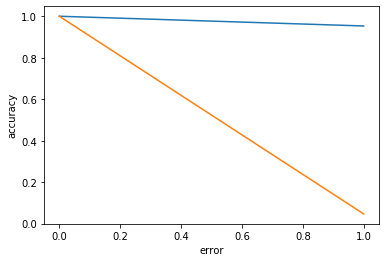

In [131]:
#ploting the graph in basis of accuracy an error
plt.plot([1,accuracy])
plt.plot([1,error])
plt.ylabel('accuracy')
plt.xlabel('error')
plt.show()

In [127]:
model.oob_decision_function_

array([[0.07692308, 0.05128205, 0.        , 0.        , 0.87179487],
       [0.48648649, 0.08108108, 0.13513514, 0.18918919, 0.10810811],
       [0.02857143, 0.14285714, 0.17142857, 0.62857143, 0.02857143],
       ...,
       [0.02857143, 0.08571429, 0.05714286, 0.        , 0.82857143],
       [0.75      , 0.03125   , 0.        , 0.09375   , 0.125     ],
       [0.26315789, 0.05263158, 0.10526316, 0.15789474, 0.42105263]])

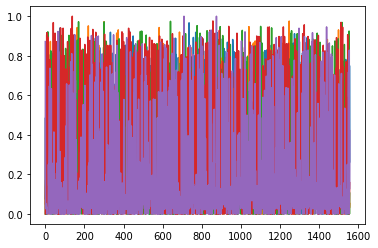

In [133]:
# ploting the desicion functions
plt.plot(model.oob_decision_function_)

In [135]:
pd.DataFrame(y_pred).to_csv("post-processed.csv")